# Commcast Telecom Complaints Analysis 

In [2]:
# importing lybraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
# Importing data set
data = pd.read_csv("Comcast_telecom_complaints_data.csv")
data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [4]:
data["Date Time"] = data["Date_month_year"] + " " + data["Time"]
data.head(3)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Date Time
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,22-Apr-15 3:53:50 PM
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,04-Aug-15 10:22:56 AM
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,18-Apr-15 9:55:47 AM


In [5]:
data["Date index"] = pd.to_datetime(data["Date Time"])
data["Date_month_year"] = pd.to_datetime(data["Date_month_year"])

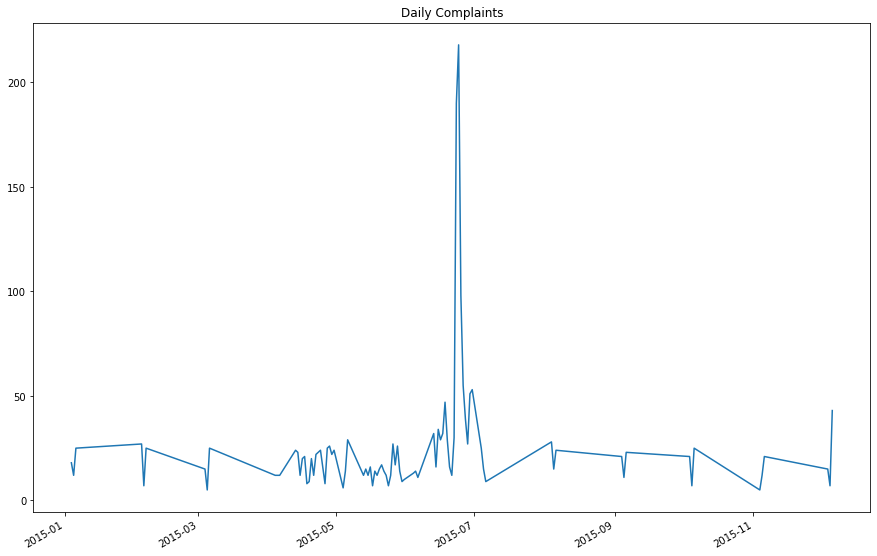

In [6]:
#plotting daily complaints graph
data["Date_month_year"].value_counts().plot(figsize = (15,10))
plt.title("Daily Complaints")
plt.show()

In [7]:
data.index = data["Date index"]

In [8]:
data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Date Time,Date index
Date index,,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,22-Apr-15 3:53:50 PM,2015-04-22 15:53:50
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,04-Aug-15 10:22:56 AM,2015-08-04 10:22:56
2015-04-18 09:55:47,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,18-Apr-15 9:55:47 AM,2015-04-18 09:55:47
2015-07-05 11:59:35,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,05-Jul-15 11:59:35 AM,2015-07-05 11:59:35
2015-05-26 13:25:26,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,26-May-15 1:25:26 PM,2015-05-26 13:25:26


In [9]:
#plotting monthly complaints graph
Monthly_data = data.groupby(pd.Grouper(freq="1M")).size()

In [10]:
Monthly_data

Date index
2015-01-31      55
2015-02-28      59
2015-03-31      45
2015-04-30     375
2015-05-31     317
2015-06-30    1046
2015-07-31      49
2015-08-31      67
2015-09-30      55
2015-10-31      53
2015-11-30      38
2015-12-31      65
Freq: M, dtype: int64

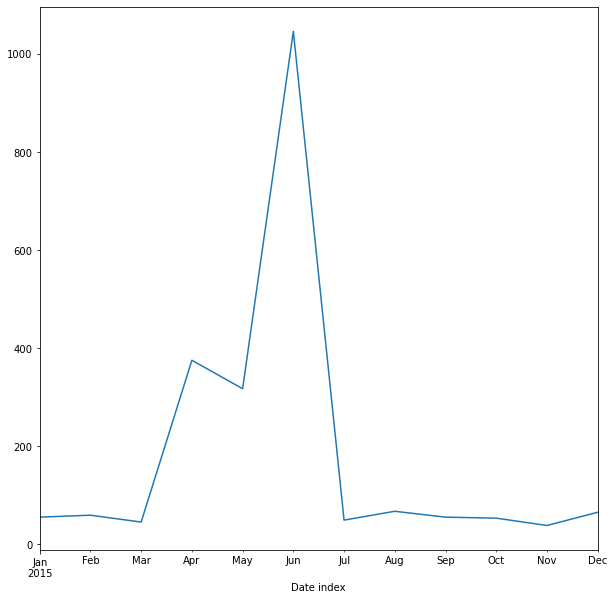

In [11]:
Monthly_data = data.groupby(pd.Grouper(freq="1MS")).size().plot(figsize=(10,10))

In [12]:
data.Status.unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [13]:
data["new_status"]=["Open" if (status == "Open" or status == "Pending") else "Close" for status in data["Status"]]

In [14]:
data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Date Time,Date index,new_status
Date index,,,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,22-Apr-15 3:53:50 PM,2015-04-22 15:53:50,Close
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,04-Aug-15 10:22:56 AM,2015-08-04 10:22:56,Close
2015-04-18 09:55:47,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,18-Apr-15 9:55:47 AM,2015-04-18 09:55:47,Close
2015-07-05 11:59:35,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,05-Jul-15 11:59:35 AM,2015-07-05 11:59:35,Open
2015-05-26 13:25:26,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,26-May-15 1:25:26 PM,2015-05-26 13:25:26,Close


In [15]:
data.groupby(["State","new_status"]).size().to_frame()

0
State         new_status    
Alabama       Close       17
              Open         9
Arizona       Close       14
              Open         6
Arkansas      Close        6
...                       ..
Virginia      Open        11
Washington    Close       75
              Open        23
West Virginia Close        8
              Open         3

[77 rows x 1 columns]

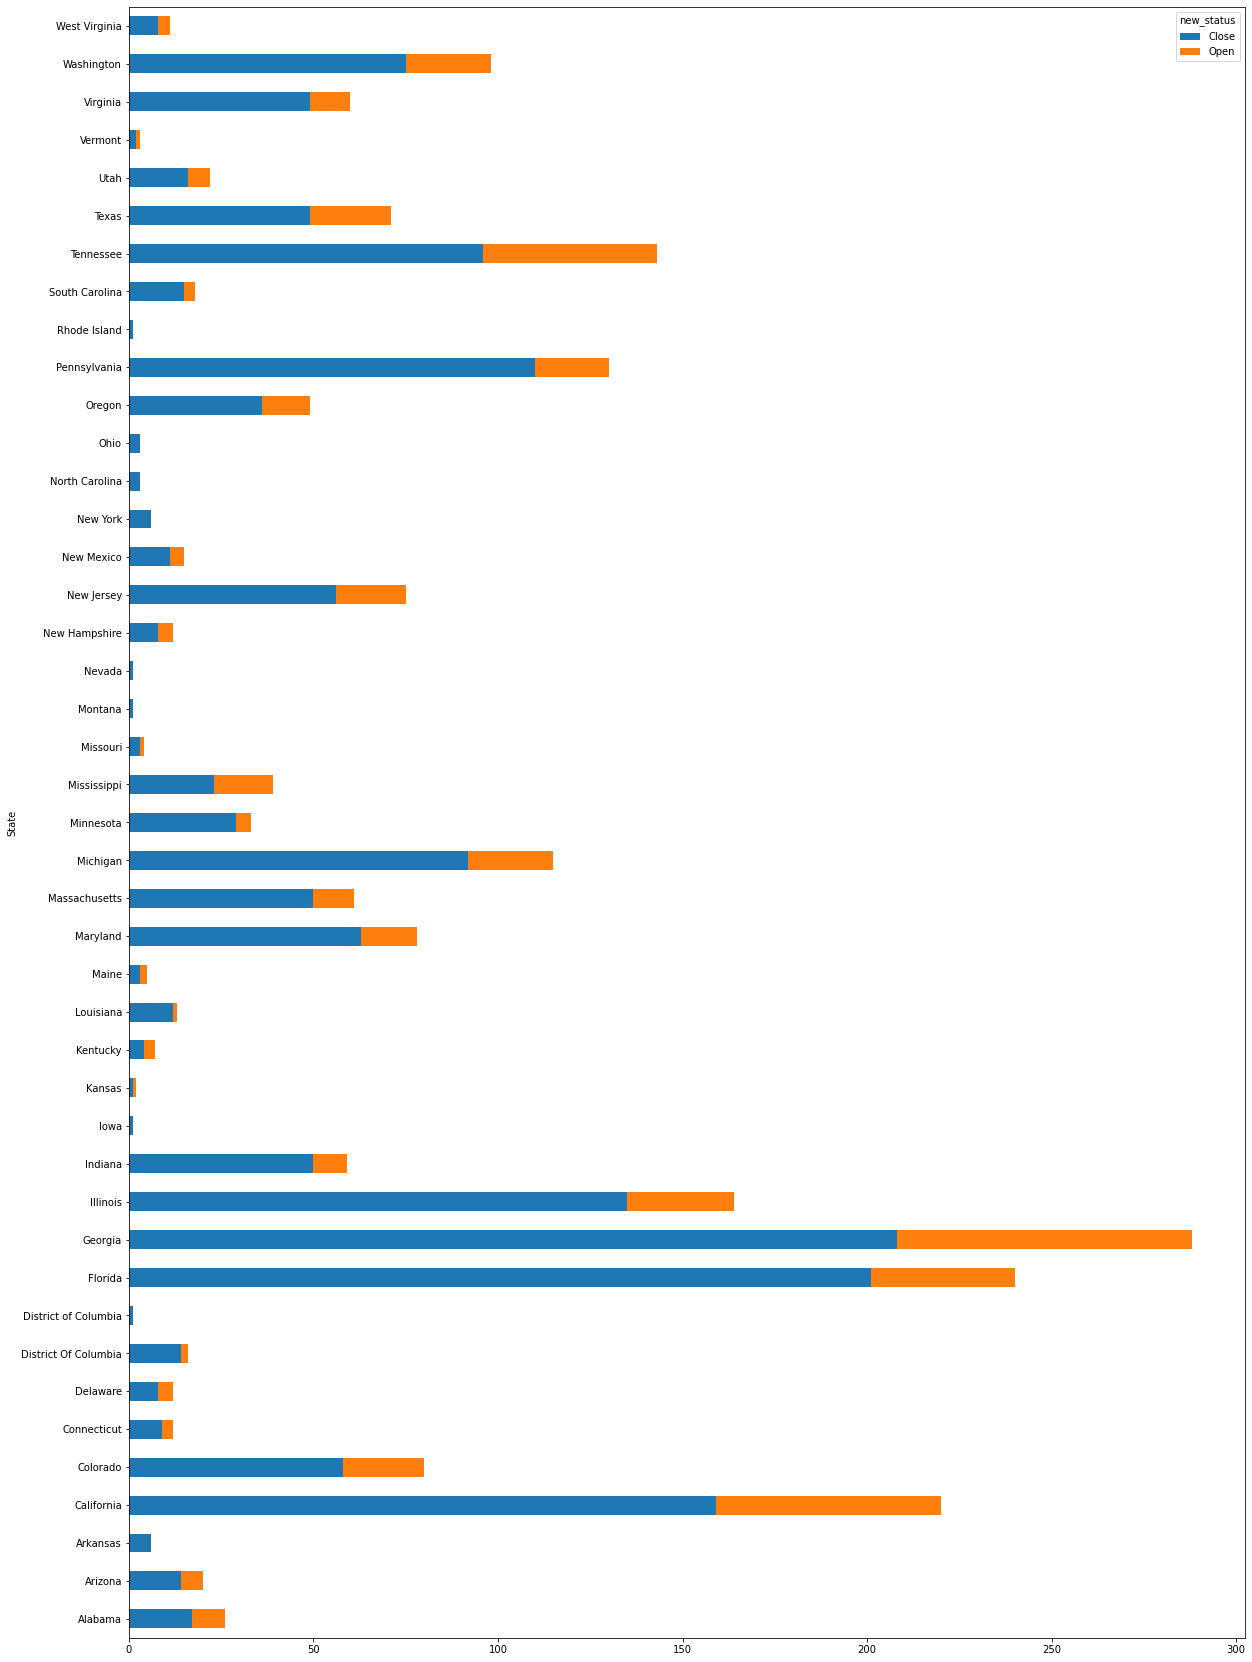

In [16]:

data.groupby(["State","new_status"]).size().unstack().plot(kind="barh", stacked = True, figsize = (20,30))
plt.show()

In [17]:
data.groupby("State").size().sort_values(ascending = False)[:10]

State
Georgia         288
Florida         240
California      220
Illinois        164
Tennessee       143
Pennsylvania    130
Michigan        115
Washington       98
Colorado         80
Maryland         78
dtype: int64

In [18]:
df = data.groupby(["State","new_status"]).size().unstack().fillna(0)
df

new_status,Close,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,0.0


In [26]:
df.sort_values("Open",ascending = False,)[:1]

new_status,Close,Open,unresolved_prc,resolved_prc
State,,,,
Georgia,208.0,80.0,15.473888,12.18512


In [27]:
df["unresolved_prc"] = df["Open"] / df["Open"].sum()*100
df["resolved_prc"] = df["Close"] / df["Close"].sum()*100

In [28]:
df.sort_values("unresolved_prc",ascending = False)[:1]

new_status,Close,Open,unresolved_prc,resolved_prc
State,,,,
Georgia,208.0,80.0,15.473888,12.18512


In [29]:
from wordcloud import WordCloud, STOPWORDS

In [30]:
txt = data["Customer Complaint"].values

In [31]:
txt

array(['Comcast Cable Internet Speeds',
       'Payment disappear - service got disconnected',
       'Speed and Service', ..., 'complaint about comcast',
       'Extremely unsatisfied Comcast customer',
       'Comcast, Ypsilanti MI Internet Speed'], dtype=object)

In [32]:
wc = WordCloud(width=200, height=100, background_color="black", stopwords=STOPWORDS).generate(str(txt))

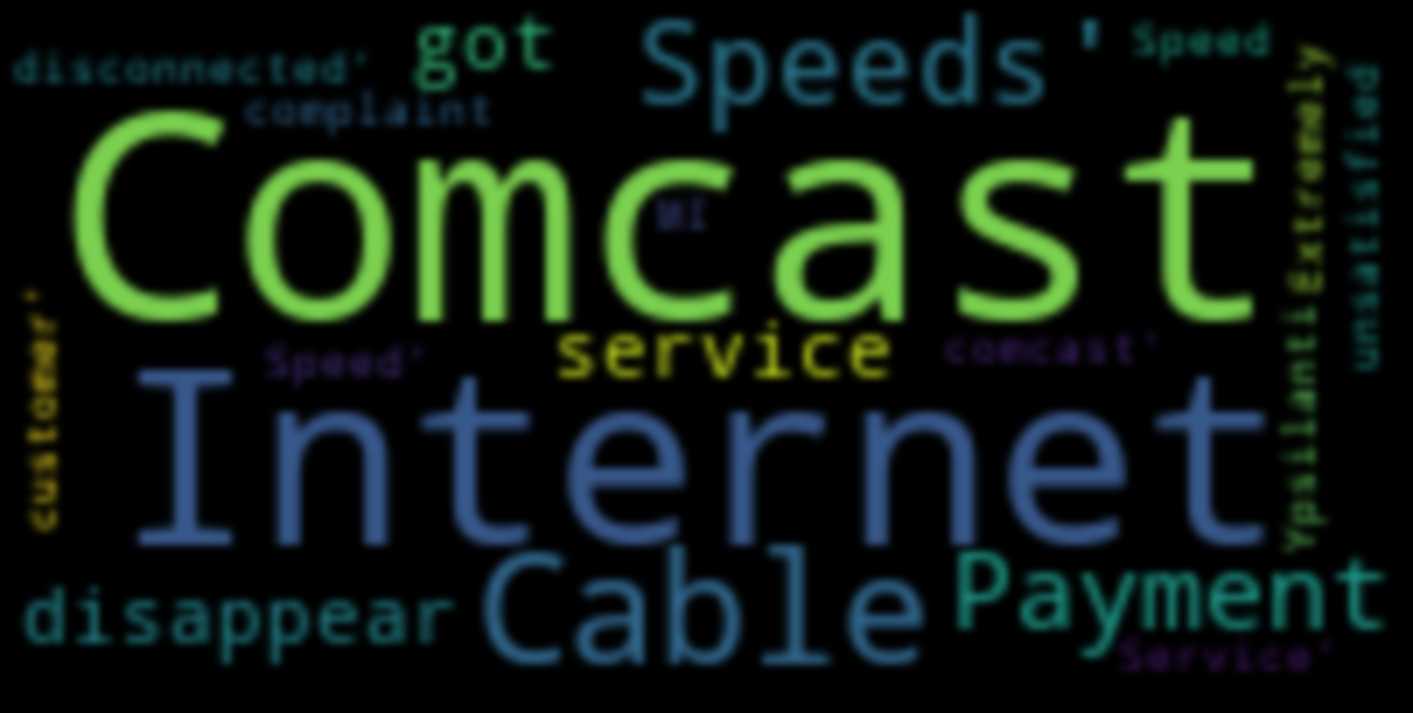

In [33]:
fig = plt.figure(figsize=(20,20), facecolor='k', edgecolor='w')
plt.imshow(wc, interpolation="bicubic")
plt.tight_layout()
plt.axis("off")
plt.show()

In [34]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')
import string

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [35]:
stop = set(stopwords.words("english"))
exclude = set(string.punctuation)
lema = WordNetLemmatizer()

In [36]:
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punct_free = "".join([ch for ch in stop_free if ch not in exclude])
    lemmatize = " ".join([lema.lemmatize(word) for word in punct_free.split()])
    return lemmatize

In [37]:
final_data = data["Customer Complaint"].tolist()

In [38]:
doc_clean = [clean(doc).split() for doc in final_data]

In [39]:
doc_clean[:10]

[['comcast', 'cable', 'internet', 'speed'],
 ['payment', 'disappear', 'service', 'got', 'disconnected'],
 ['speed', 'service'],
 ['comcast',
  'imposed',
  'new',
  'usage',
  'cap',
  '300gb',
  'punishes',
  'streaming'],
 ['comcast', 'working', 'service', 'boot'],
 ['isp', 'charging', 'arbitrary', 'data', 'limit', 'overage', 'fee'],
 ['throttling', 'service', 'unreasonable', 'data', 'cap'],
 ['comcast', 'refuse', 'help', 'troubleshoot', 'correct', 'service'],
 ['comcast', 'extended', 'outage'],
 ['comcast', 'raising', 'price', 'available', 'ask']]

In [40]:
import gensim
from gensim import corpora

In [41]:
dic = corpora.Dictionary(doc_clean)
print(dic)

Dictionary(1412 unique tokens: ['cable', 'comcast', 'internet', 'speed', 'disappear']...)


In [42]:
doc_term_matrix = [dic.doc2bow(doc) for doc in doc_clean]
doc_term_matrix[:10]

[[(0, 1), (1, 1), (2, 1), (3, 1)],
 [(4, 1), (5, 1), (6, 1), (7, 1), (8, 1)],
 [(3, 1), (8, 1)],
 [(1, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1)],
 [(1, 1), (8, 1), (16, 1), (17, 1)],
 [(18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1)],
 [(8, 1), (10, 1), (20, 1), (25, 1), (26, 1)],
 [(1, 1), (8, 1), (27, 1), (28, 1), (29, 1), (30, 1)],
 [(1, 1), (31, 1), (32, 1)],
 [(1, 1), (33, 1), (34, 1), (35, 1), (36, 1)]]

In [43]:
from gensim.models import LdaModel

In [44]:
num_of_topics = 9
ldamodel = LdaModel(doc_term_matrix, num_topics=num_of_topics, id2word=dic, passes=30)

In [46]:
topics = ldamodel.show_topics()
for topic in topics:
    print(topic)

(0, '0.063*"comcast" + 0.034*"connection" + 0.032*"issue" + 0.032*"day" + 0.030*"failure" + 0.027*"show" + 0.021*"appointment" + 0.020*"connectivity" + 0.019*"signal" + 0.019*"lack"')
(1, '0.098*"comcast" + 0.057*"speed" + 0.044*"price" + 0.043*"service" + 0.023*"high" + 0.022*"terrible" + 0.018*"monopoly" + 0.018*"paying" + 0.015*"promised" + 0.013*"refund"')
(2, '0.085*"comcast" + 0.068*"service" + 0.067*"bill" + 0.027*"monthly" + 0.026*"without" + 0.021*"cramming" + 0.018*"speed" + 0.016*"bait" + 0.016*"unreliable" + 0.016*"increased"')
(3, '0.122*"comcast" + 0.099*"issue" + 0.084*"xfinity" + 0.061*"billing" + 0.046*"pricing" + 0.025*"help" + 0.021*"charging" + 0.018*"modem" + 0.018*"equipment" + 0.018*"unfair"')
(4, '0.068*"service" + 0.056*"fee" + 0.050*"charged" + 0.032*"comcast" + 0.031*"back" + 0.028*"billed" + 0.024*"xfinitycomcast" + 0.017*"claim" + 0.016*"incorrect" + 0.016*"throttle"')
(5, '0.348*"internet" + 0.116*"comcast" + 0.088*"service" + 0.066*"speed" + 0.032*"slow" 

In [47]:
word_dict = {}
for i in range(num_of_topics):
    words = ldamodel.show_topic(i, topn = 20)
    word_dict["Topic #" + "{}".format(i)] = [i[0] for i in words]

In [48]:
pd.DataFrame(word_dict)

,Topic #0,Topic #1,Topic #2,Topic #3,Topic #4,Topic #5,Topic #6,Topic #7,Topic #8
0,comcast,comcast,comcast,comcast,service,internet,comcast,comcast,cable
1,connection,speed,service,issue,fee,comcast,data,service,bill
2,issue,price,bill,xfinity,charged,service,cap,billing,fraudulent
3,day,service,monthly,billing,comcast,speed,charge,complaint,overcharge
4,failure,high,without,pricing,back,slow,usage,practice,scam
5,show,terrible,cramming,help,billed,problem,overage,customer,disconnection
6,appointment,monopoly,speed,charging,xfinitycomcast,comcastxfinity,limit,unfair,pay
7,connectivity,paying,bait,modem,claim,business,payment,poor,improper
8,signal,promised,unreliable,equipment,incorrect,outage,account,throttling,every
9,lack,refund,increased,unfair,throttle,access,email,false,line


In [49]:
import pyLDAvis.gensim_models

In [50]:
lda_display = pyLDAvis.gensim_models.prepare(ldamodel, doc_term_matrix, dic, sort_topics = False)

H:\New folder\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [51]:
pyLDAvis.display(lda_display)

H:\New folder\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
